In [49]:
import pandas as pd
import numpy as np
import email
import matplotlib.pyplot as plt
import networkx as nx

In [50]:
# Reading the dataset
dataframe=pd.read_csv("/Volumes/T7/Python Project/Social Networ Graph/emails.csv")

In [51]:
print(dataframe.head())
dataframe.shape

                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...


(517401, 2)

In [52]:
# Dropping the 'file' column
df=dataframe.drop('file',axis=1)

In [53]:
# Function to extract fields from the message
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [54]:
# Extracting 'From' and 'To' fields from email messages
df['From']=get_field('From',df['message'])
df['To']=get_field('To',df['message'])

In [55]:
# Dropping the 'message' column
edf=df.drop('message',axis=1)

In [56]:
edf.head()

,From,To
0,phillip.allen@enron.com,tim.belden@enron.com
1,phillip.allen@enron.com,john.lavorato@enron.com
2,phillip.allen@enron.com,leah.arsdall@enron.com
3,phillip.allen@enron.com,randall.gay@enron.com
4,phillip.allen@enron.com,greg.piper@enron.com


In [57]:
edf.isna().sum() 

From        0
To      21847
dtype: int64

In [58]:
# Dropping null values and resetting index
edf=edf.dropna()
edf = edf.reset_index(drop=True)
print(edf.head(50))
print(edf.shape)

                       From                                                 To
0   phillip.allen@enron.com                               tim.belden@enron.com
1   phillip.allen@enron.com                            john.lavorato@enron.com
2   phillip.allen@enron.com                             leah.arsdall@enron.com
3   phillip.allen@enron.com                              randall.gay@enron.com
4   phillip.allen@enron.com                               greg.piper@enron.com
5   phillip.allen@enron.com                               greg.piper@enron.com
6   phillip.allen@enron.com   david.l.johnson@enron.com, john.shafer@enron.com
7   phillip.allen@enron.com                           joyce.teixeira@enron.com
8   phillip.allen@enron.com                               mark.scott@enron.com
9   phillip.allen@enron.com                                    zimam@enron.com
10  phillip.allen@enron.com                         buck.buckner@honeywell.com
11  phillip.allen@enron.com                         

In [59]:
# Splitting 'To' column by commas and exploding it into individual rows
edf['To'] = edf['To'].apply(lambda x: x.split(','))
edf = edf.explode('To', ignore_index=True)
edf.shape

(3130272, 2)

In [60]:
# Stripping whitespace from 'From' and 'To' columns
edf['From']=edf['From'].str.strip()
edf['To']=edf['To'].str.strip()

In [61]:
# Dropping self-references (same sender and receiver)
index=edf[(edf["From"]==edf["To"])].index
print(index)
edf.drop(index,inplace=True)

Index([   1131,    1678,    1689,    1954,    2064,    2232,    2363,    2376,
          2377,    2572,
       ...
       3128017, 3128023, 3128027, 3128031, 3128035, 3128038, 3128126, 3128457,
       3128889, 3129677],
      dtype='int64', length=28713)


In [ ]:
# Dropping duplicate entries
edf=edf.drop_duplicates()
df.shape

(517401, 3)

In [63]:
# Getting unique senders and receivers
unique_senders = edf['From'].value_counts()
print(unique_senders.head(50))

From
outlook.team@enron.com              1566
david.forster@enron.com             1394
sally.beck@enron.com                1249
technology.enron@enron.com          1248
kenneth.lay@enron.com               1052
jeff.dasovich@enron.com              981
tracey.kozadinos@enron.com           919
julie.clyatt@enron.com               876
bodyshop@enron.com                   867
lee.wright@enron.com                 842
tana.jones@enron.com                 829
body.shop@enron.com                  828
jeff.skilling@enron.com              808
vince.kaminski@enron.com             797
bob.ambrocik@enron.com               794
jacqueline.coleman@enron.com         793
billy.lemmons@enron.com              781
david.oxley@enron.com                728
daniel.muschar@enron.com             726
sara.shackleton@enron.com            719
constance.charles@enron.com          716
sonya.johnson@enron.com              711
lynette.crawford@enron.com           695
rosalee.fleming@enron.com            691
tammie.scho

In [64]:
unique_receivers = edf['To'].value_counts()
print(unique_receivers.head(50)) 

To
klay@enron.com                1336
kenneth.lay@enron.com          762
jeff.skilling@enron.com        722
sara.shackleton@enron.com      693
louise.kitchen@enron.com       685
jeff.dasovich@enron.com        671
tana.jones@enron.com           640
sally.beck@enron.com           584
mark.taylor@enron.com          543
john.lavorato@enron.com        539
gerald.nemec@enron.com         536
greg.whalley@enron.com         456
richard.shapiro@enron.com      436
vince.kaminski@enron.com       402
kay.mann@enron.com             398
steven.kean@enron.com          396
rick.buy@enron.com             390
elizabeth.sager@enron.com      382
rod.hayslett@enron.com         375
don.baughman@enron.com         367
chris.germany@enron.com        351
benjamin.rogers@enron.com      336
michelle.cash@enron.com        327
j.kaminski@enron.com           326
shelley.corman@enron.com       315
stanley.horton@enron.com       309
scott.neal@enron.com           307
a..shankman@enron.com          297
mike.mcconnell@en

In [65]:
# Getting the top 10 senders and receivers
top_sen=unique_senders.head(10)
top10_senders = top_sen.index.tolist()
top_rec = unique_receivers.head(10)
top10_rec = top_rec.index.tolist()

In [73]:
# Creating the set of core users (top senders and receivers)
core_users = set(top10_senders).union(set(top10_rec))
for index,i in enumerate(core_users, 1):
    print(f"{index}.", i)

1. outlook.team@enron.com
2. technology.enron@enron.com
3. louise.kitchen@enron.com
4. klay@enron.com
5. sara.shackleton@enron.com
6. john.lavorato@enron.com
7. tana.jones@enron.com
8. tracey.kozadinos@enron.com
9. david.forster@enron.com
10. kenneth.lay@enron.com
11. sally.beck@enron.com
12. lee.wright@enron.com
13. jeff.dasovich@enron.com
14. bodyshop@enron.com
15. julie.clyatt@enron.com
16. mark.taylor@enron.com
17. jeff.skilling@enron.com


In [67]:
# Creating a network graph using NetworkX
G = nx.Graph()

# Adding edges for the core users
for index, row in edf.iterrows():
    sender = row['From']
    recipient = row['To']

    if sender in core_users:
        if recipient in core_users:
            if not G.has_edge(sender, recipient):
                G.add_edge(sender, recipient, weight=1)

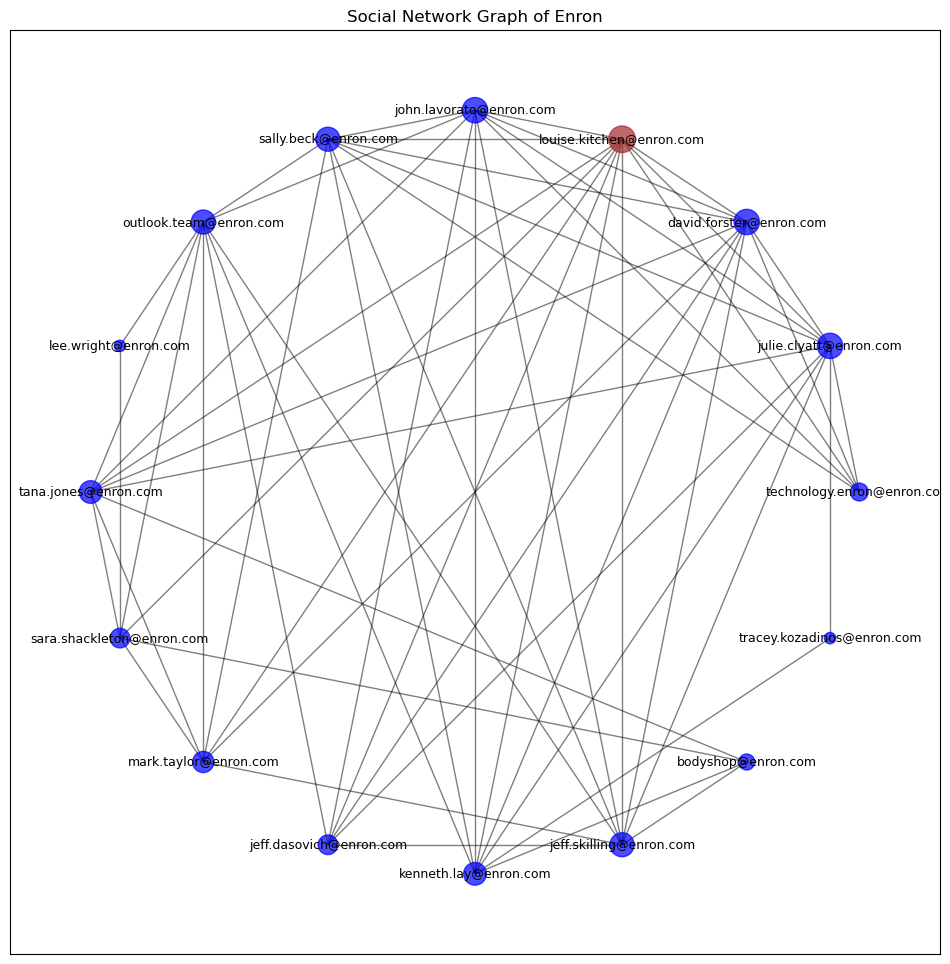

In [68]:


# Calculating degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Plotting the network graph
plt.figure(figsize=(12, 12))

node_sizes = [500 * degree_centrality[node] for node in G.nodes()]

most_central_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_centrality_value = most_central_nodes[0][1]
influential_nodes=[]
for node, centrality_value in most_central_nodes:
     if centrality_value==top_centrality_value:
          influential_nodes.append(node)

n_colors = ['brown' if node in influential_nodes else 'blue' for node in G.nodes()]

# Circular layout for the graph
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=n_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=9, font_family="sans-serif")

# Display the graph
plt.title("Social Network Graph of Enron")
plt.show()

In [69]:

# Print the most influential person

if len(influential_nodes)==1:
    most_influential_node = max(degree_centrality, key=degree_centrality.get) 
    print(f"The most influential person is: {most_influential_node}")
else:
    for i in influential_nodes:
         print(i)
        

The most influential person is: louise.kitchen@enron.com
